## ✍ 그래픽 및 library 호출


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
# 시각화를 위한 폰트설정


# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## ✍ 데이터 load

In [2]:
df = pd.read_csv('melon_chart_month_DM0000_210629_163304.txt', delimiter='\t')

In [3]:
df.columns = ['rank', 'singer', 'title', 'rank_change', 'like', 'release_date', 'genre', 'n_of_comment', 'url', 'n_of_fan']

In [4]:
df

,rank,singer,title,rank_change,like,release_date,genre,n_of_comment,url,n_of_fan
0,1,브레이브걸스,롤린 (Rollin'),0,278686,2017.03.07,댄스,7671,https://www.melon.com/song/detail.htm?songId=3...,49940
1,2,아이유,라일락,0,200496,2021.03.25,댄스,2121,https://www.melon.com/song/detail.htm?songId=3...,742373
2,3,브레이브걸스,운전만해 (We Ride),2,120782,2020.08.14,댄스,2726,https://www.melon.com/song/detail.htm?songId=3...,49940
3,4,아이유,Celebrity,-1,289539,2021.03.25,댄스,3956,https://www.melon.com/song/detail.htm?songId=3...,742373
4,5,SG 워너비,Timeless,24,93379,2004.01.20,발라드,576,https://www.melon.com/song/detail.htm?songId=1...,56695
...,...,...,...,...,...,...,...,...,...,...
95,96,현아,I'm Not Cool,-27,38139,2021.01.28,댄스,477,https://www.melon.com/song/detail.htm?songId=3...,39911
96,97,윤하 (YOUNHA),서른 밤째 (바른연애 길잡이 X 윤하 (YOUNHA)),-14,42028,2021.02.08,발라드,119,https://www.melon.com/song/detail.htm?songId=3...,95540
97,98,NCT DREAM,고래 (Dive Into You),2,80723,2021.05.10,댄스,1207,https://www.melon.com/song/detail.htm?songId=3...,146090
98,99,SHINee (샤이니),Don't Call Me,-19,68549,2021.02.22,댄스,2252,https://www.melon.com/song/detail.htm?songId=3...,128196


## ✍ 결측치 확인

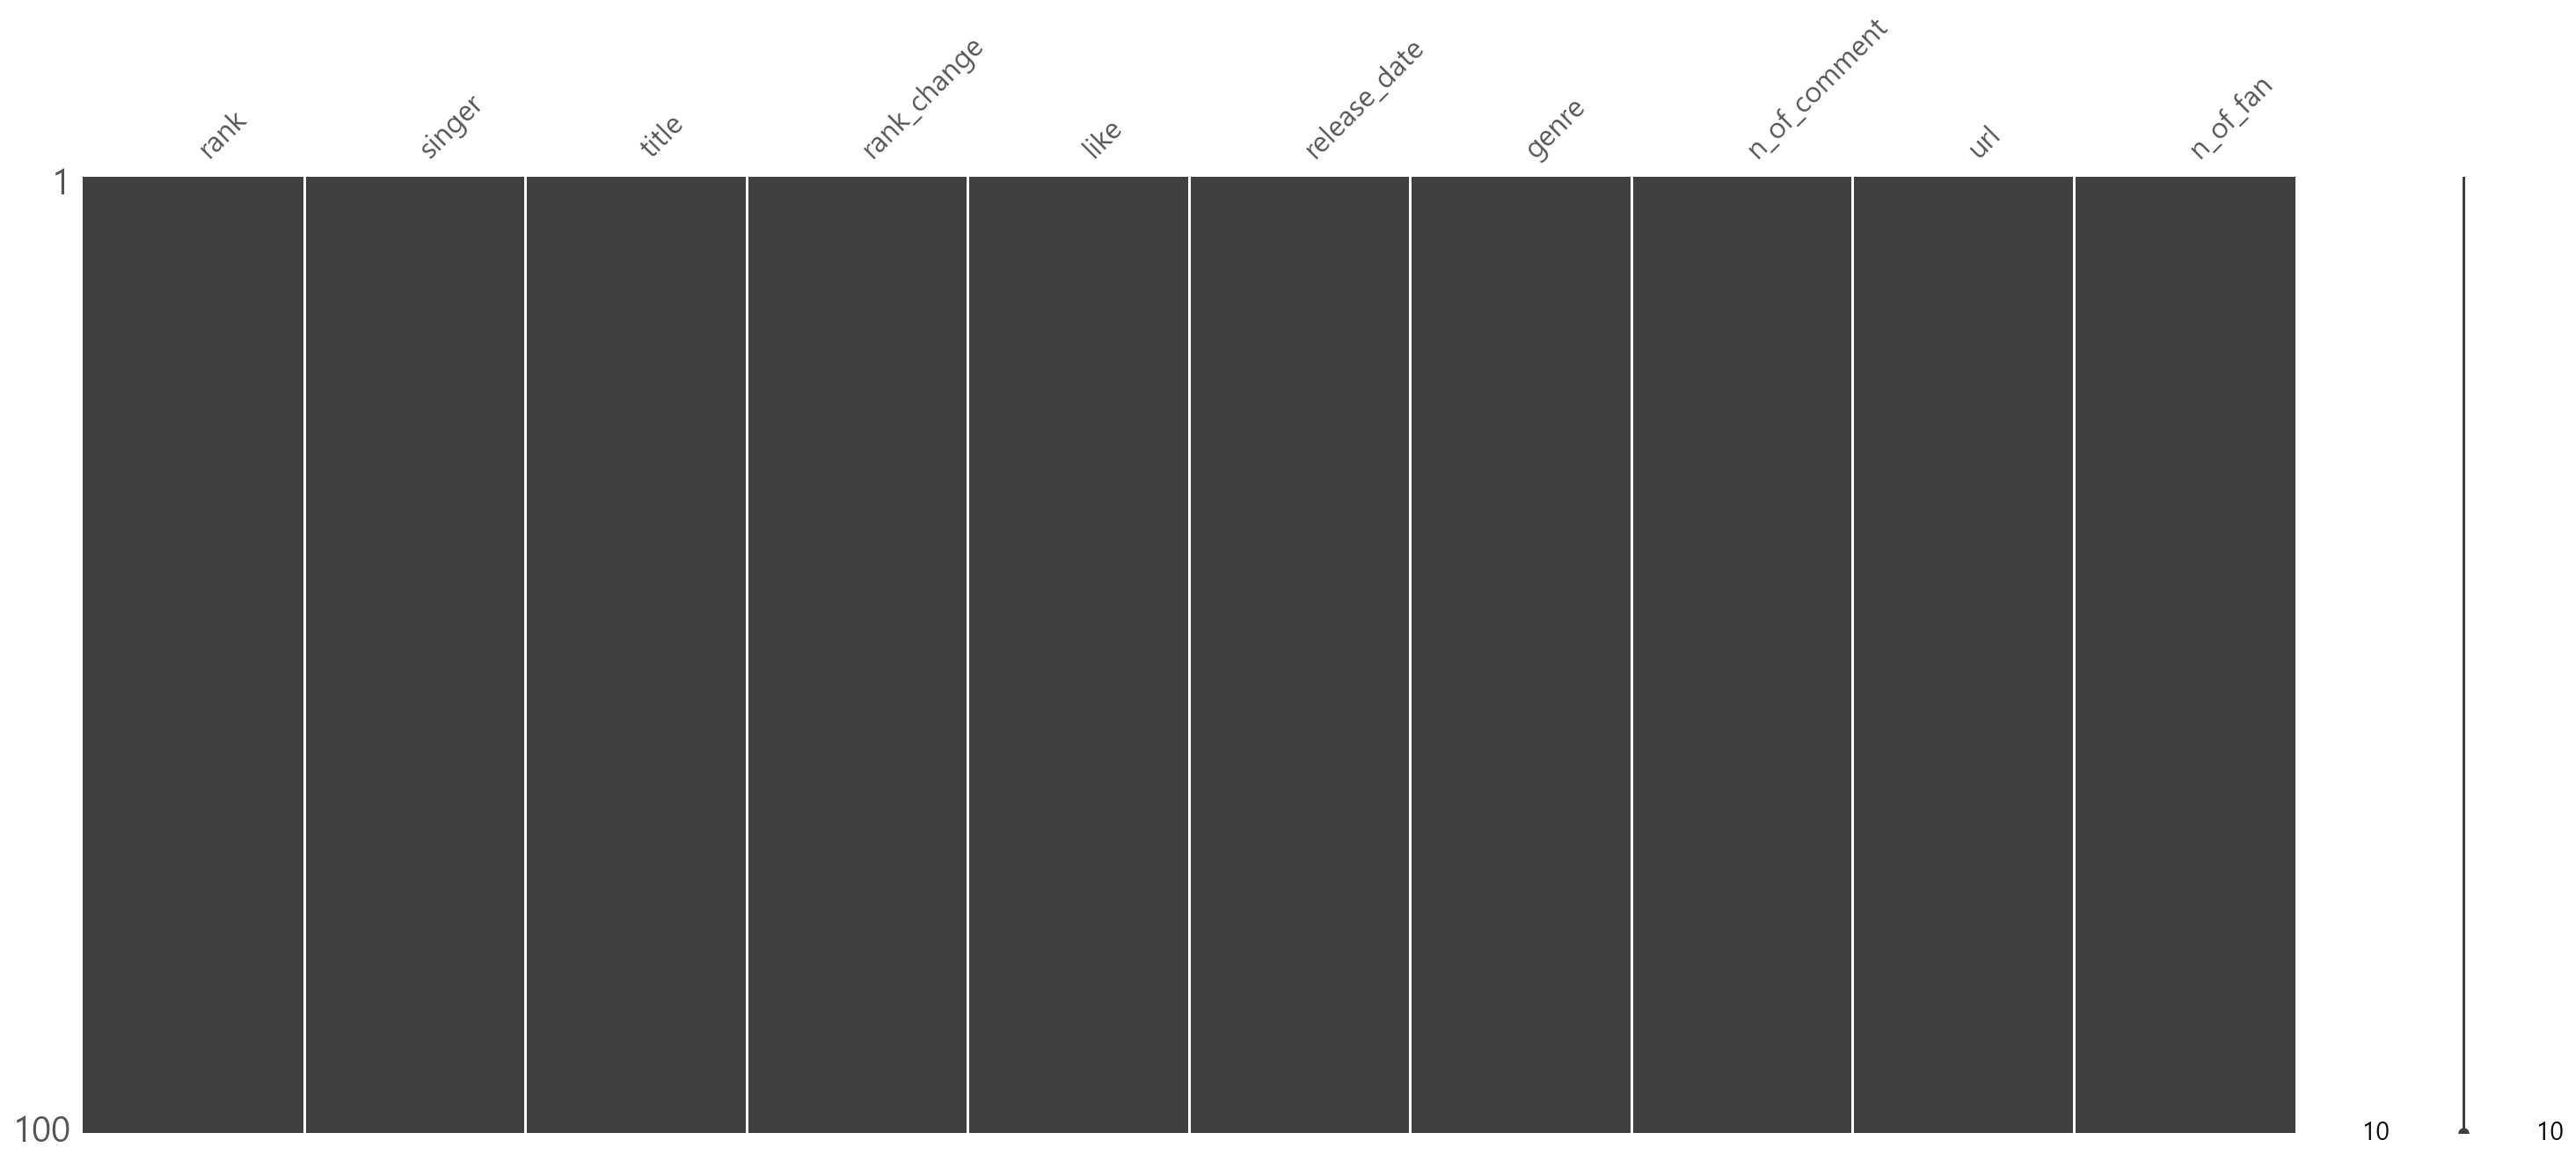

In [5]:
import missingno as msno
msno.matrix(df)
plt.show()

## ✍ 데이터 기본 정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          100 non-null    int64 
 1   singer        100 non-null    object
 2   title         100 non-null    object
 3   rank_change   100 non-null    int64 
 4   like          100 non-null    int64 
 5   release_date  100 non-null    object
 6   genre         100 non-null    object
 7   n_of_comment  100 non-null    int64 
 8   url           100 non-null    object
 9   n_of_fan      100 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [7]:
df.describe()

,rank,rank_change,like,n_of_comment,n_of_fan
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.880000,132209.320000,2086.390000,197663.410000
std,29.011492,28.443913,103806.808766,3145.472452,273841.439806
min,1.000000,-53.000000,20109.000000,54.000000,346.000000
25%,25.750000,-11.000000,59211.250000,256.500000,29415.500000
50%,50.500000,-6.000000,94096.500000,886.000000,67009.000000
75%,75.250000,3.000000,186369.250000,2640.500000,156347.000000
max,100.000000,92.000000,540893.000000,20923.000000,771884.000000


## ✍ 날짜 처리

In [8]:
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month

date1 = datetime.strptime("20210531", "%Y%m%d")
df['elapsed_days'] = (date1-df['release_date']).dt.days

## ✍ 기본 EDA

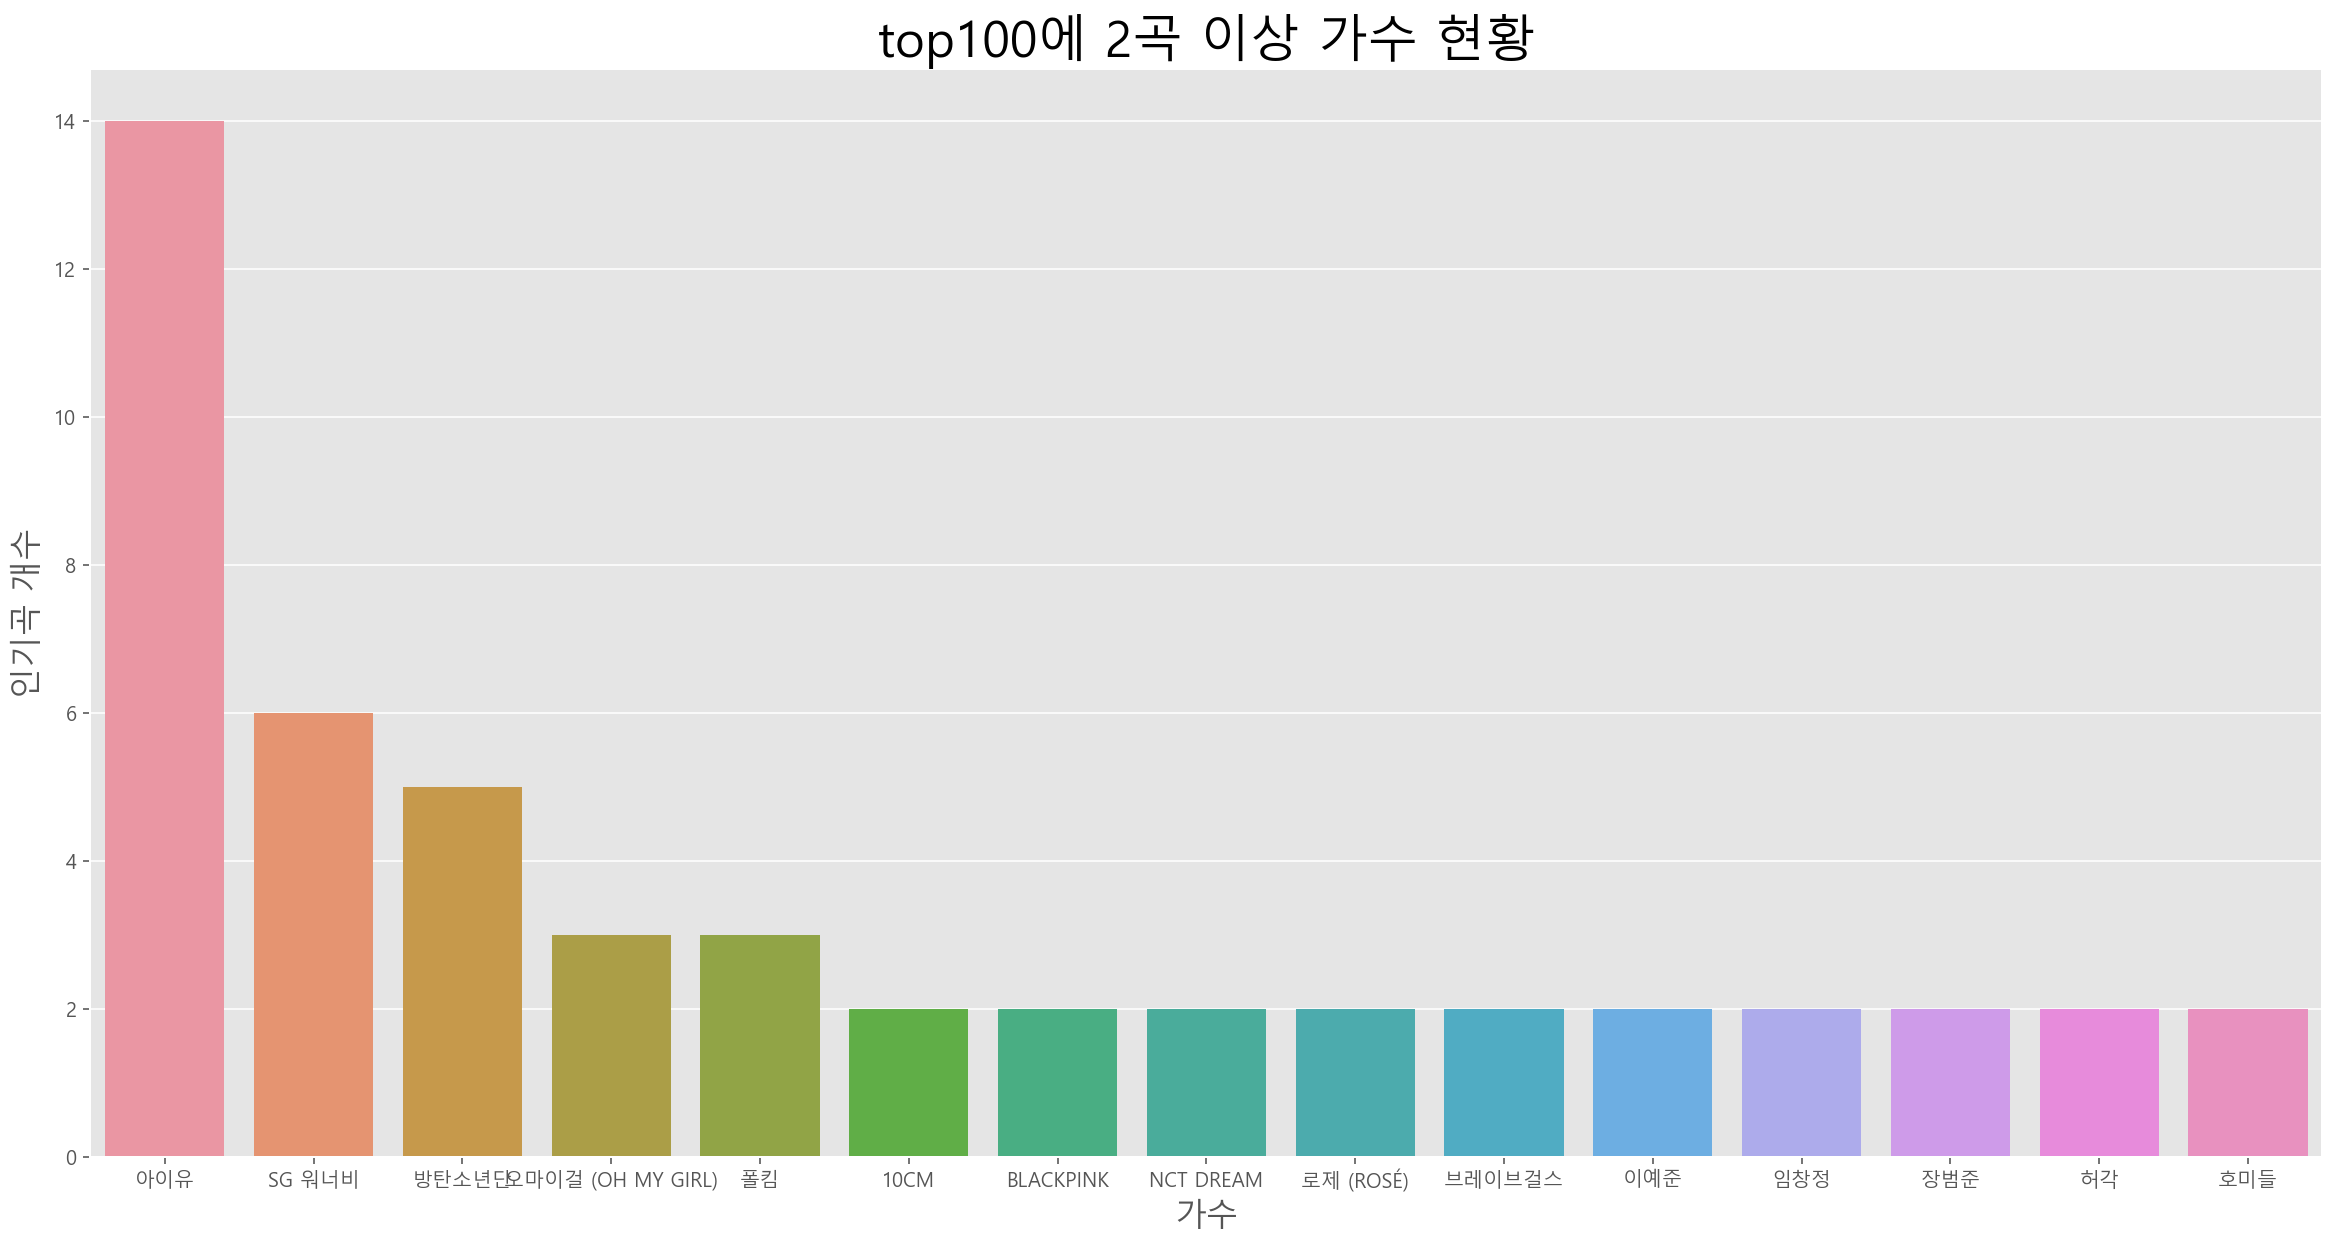

In [9]:
singer_count = df['url'].groupby(df['singer']).count()

singer_count_2 = singer_count[singer_count >= 2].sort_values(ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x=singer_count_2.index, y= singer_count_2.values)
plt.xlabel('가수', fontsize=16)
plt.ylabel('인기곡 개수', fontsize=16)
plt.title('top100에 2곡 이상 가수 현황', fontsize=25)
plt.show()

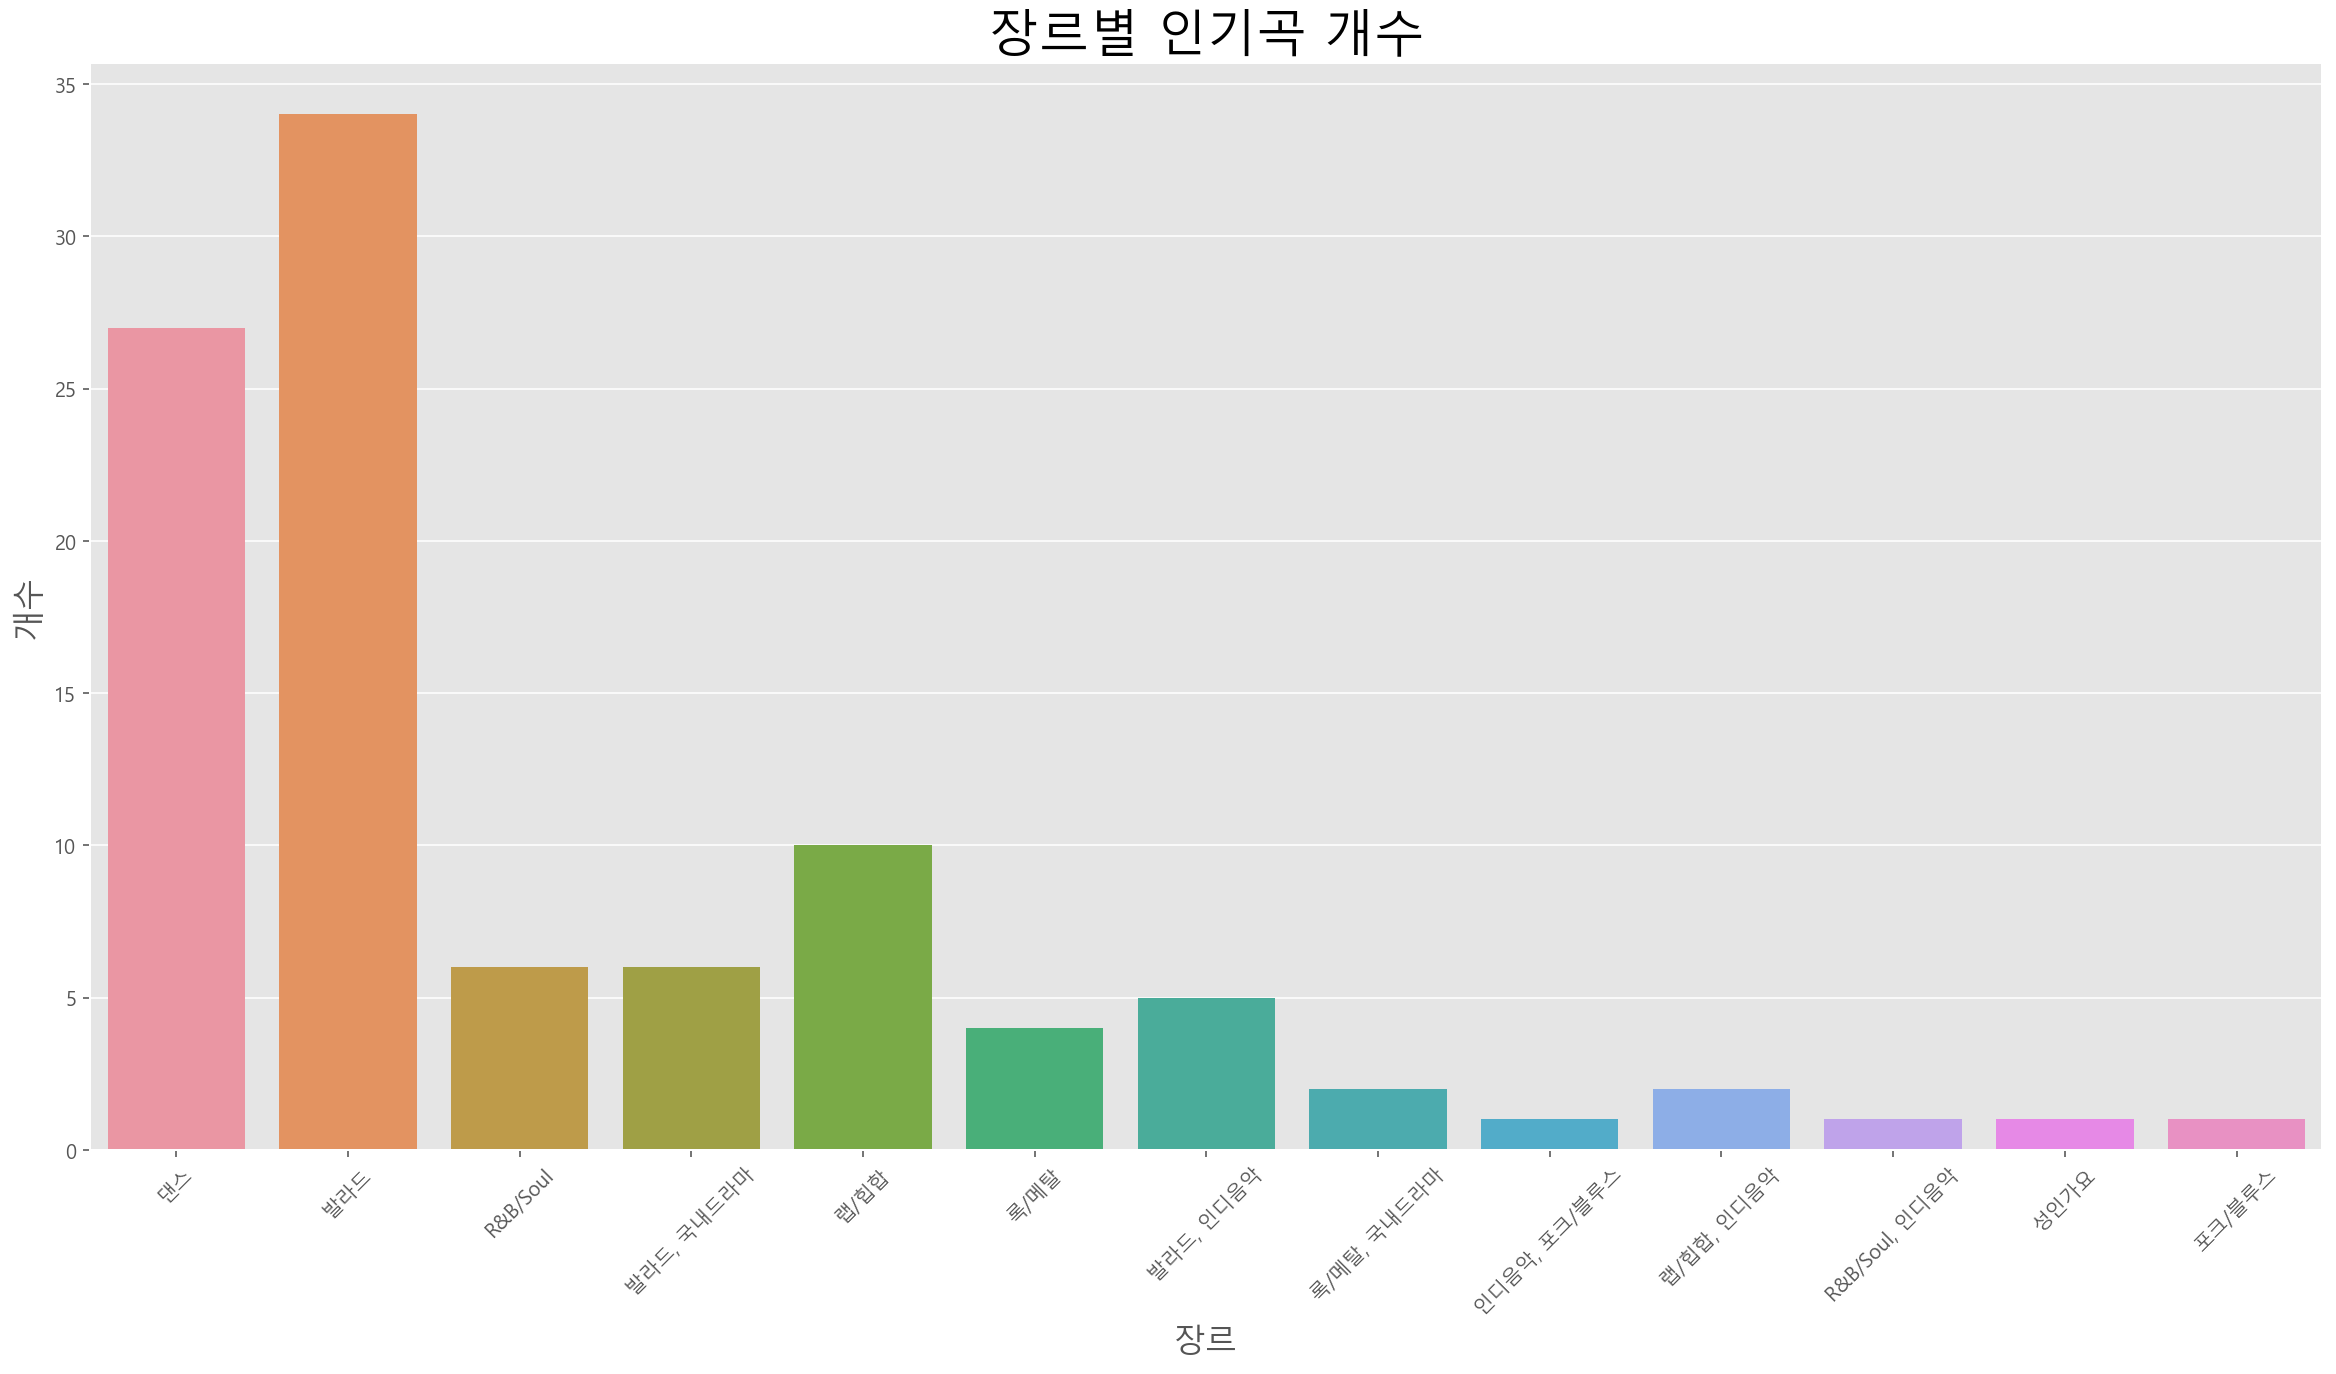

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='genre')
plt.xlabel('장르', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.title('장르별 인기곡 개수', fontsize=25)
plt.xticks(rotation=45)
plt.show()

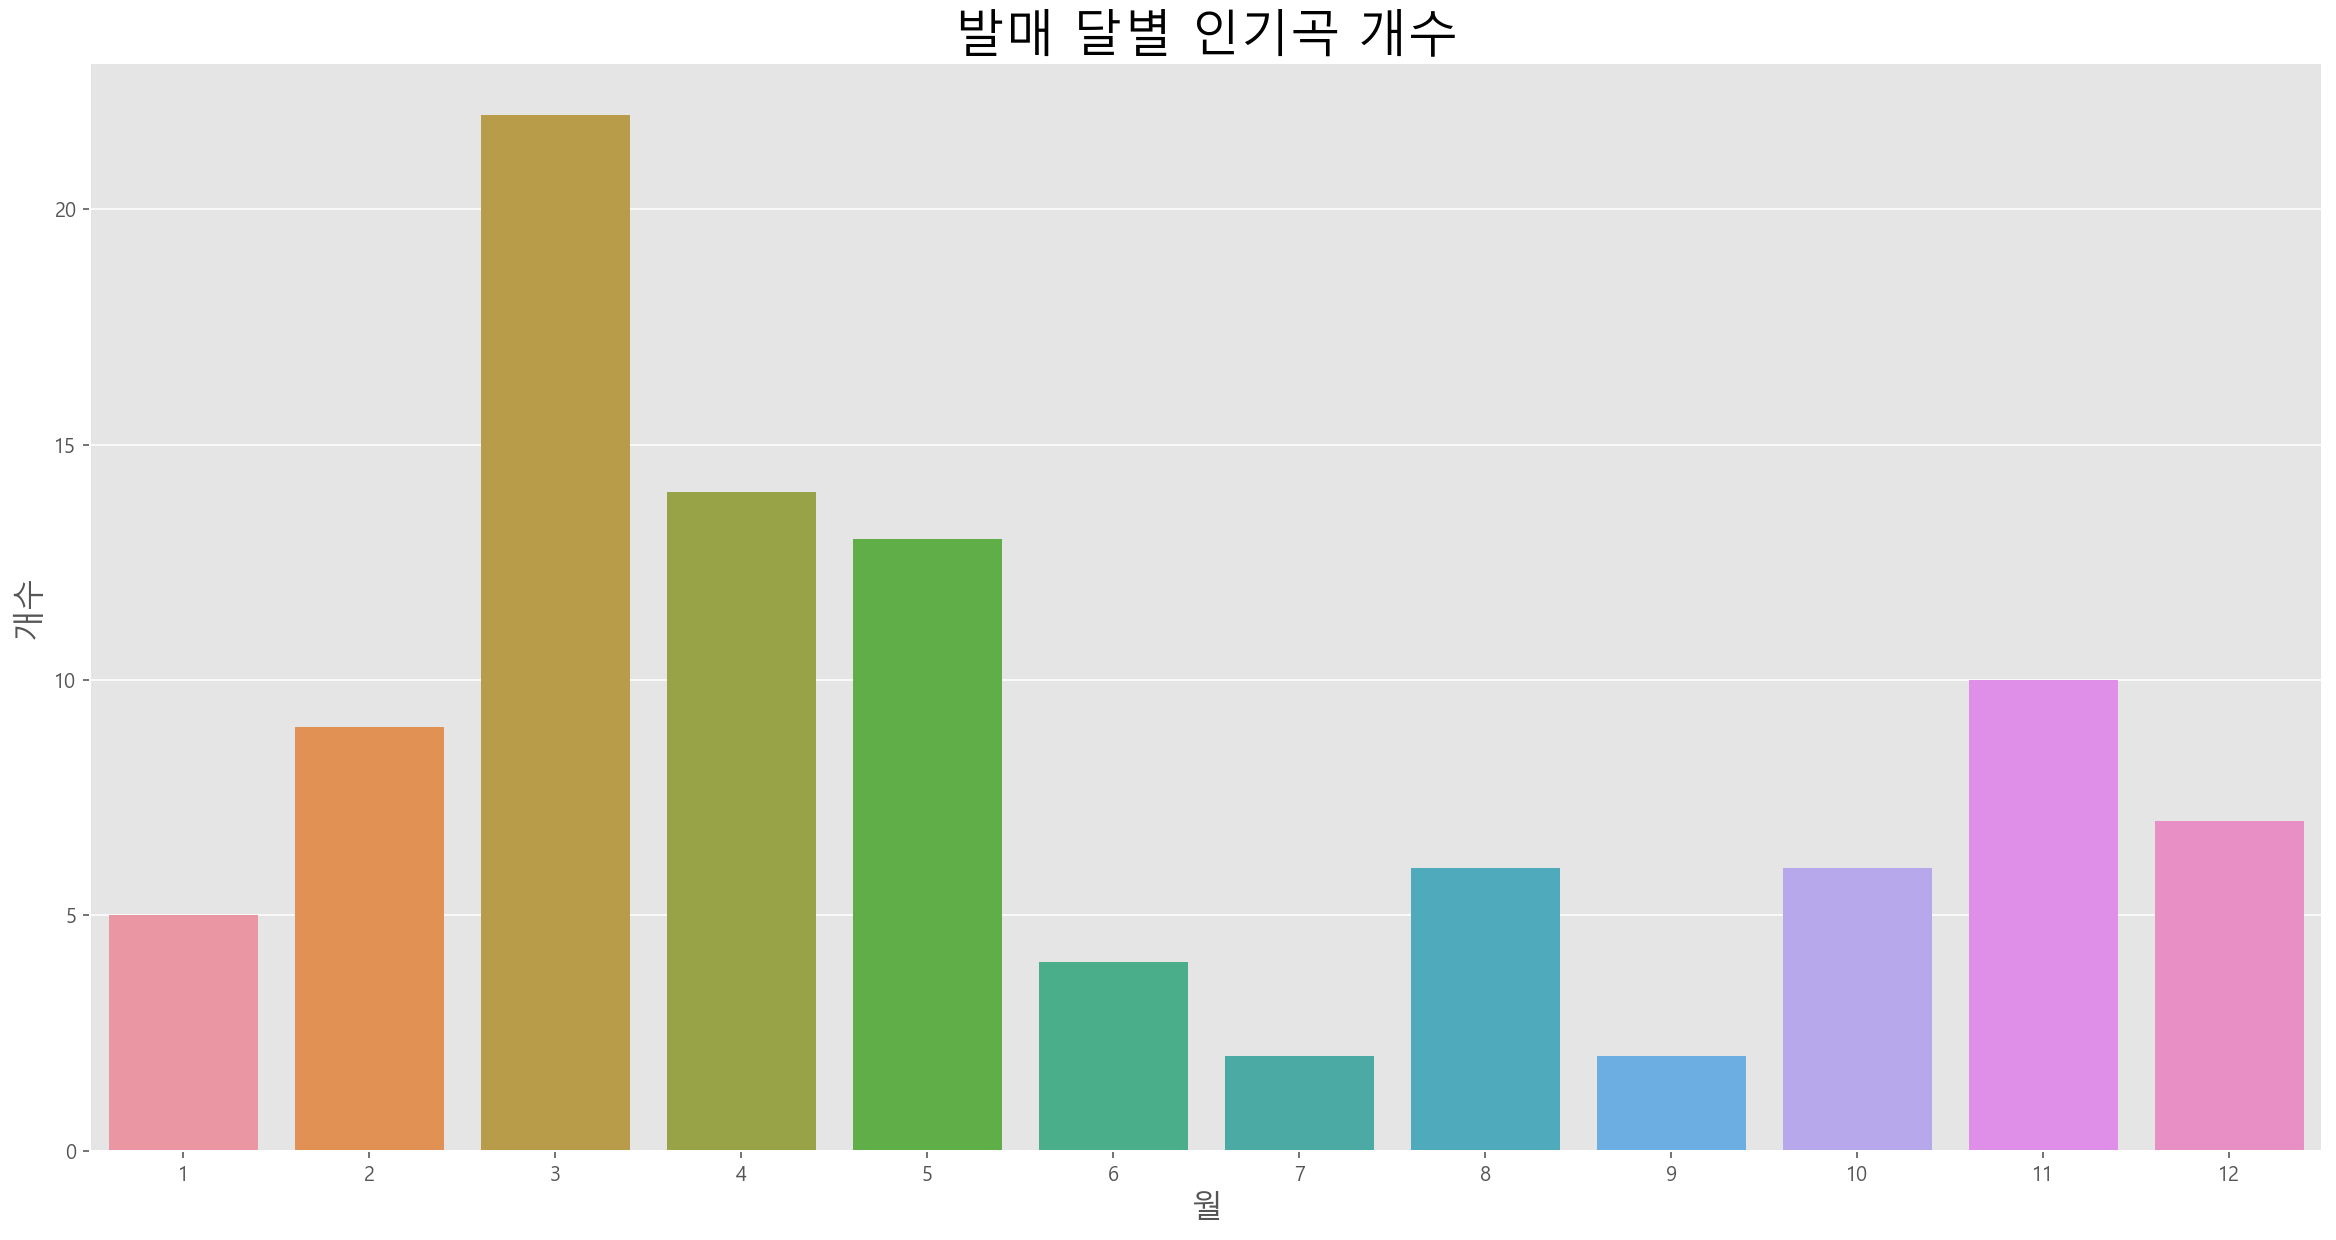

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='month')
plt.xlabel('월', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.title('발매 달별 인기곡 개수', fontsize=25)
plt.show()

## ✍ 상관관계

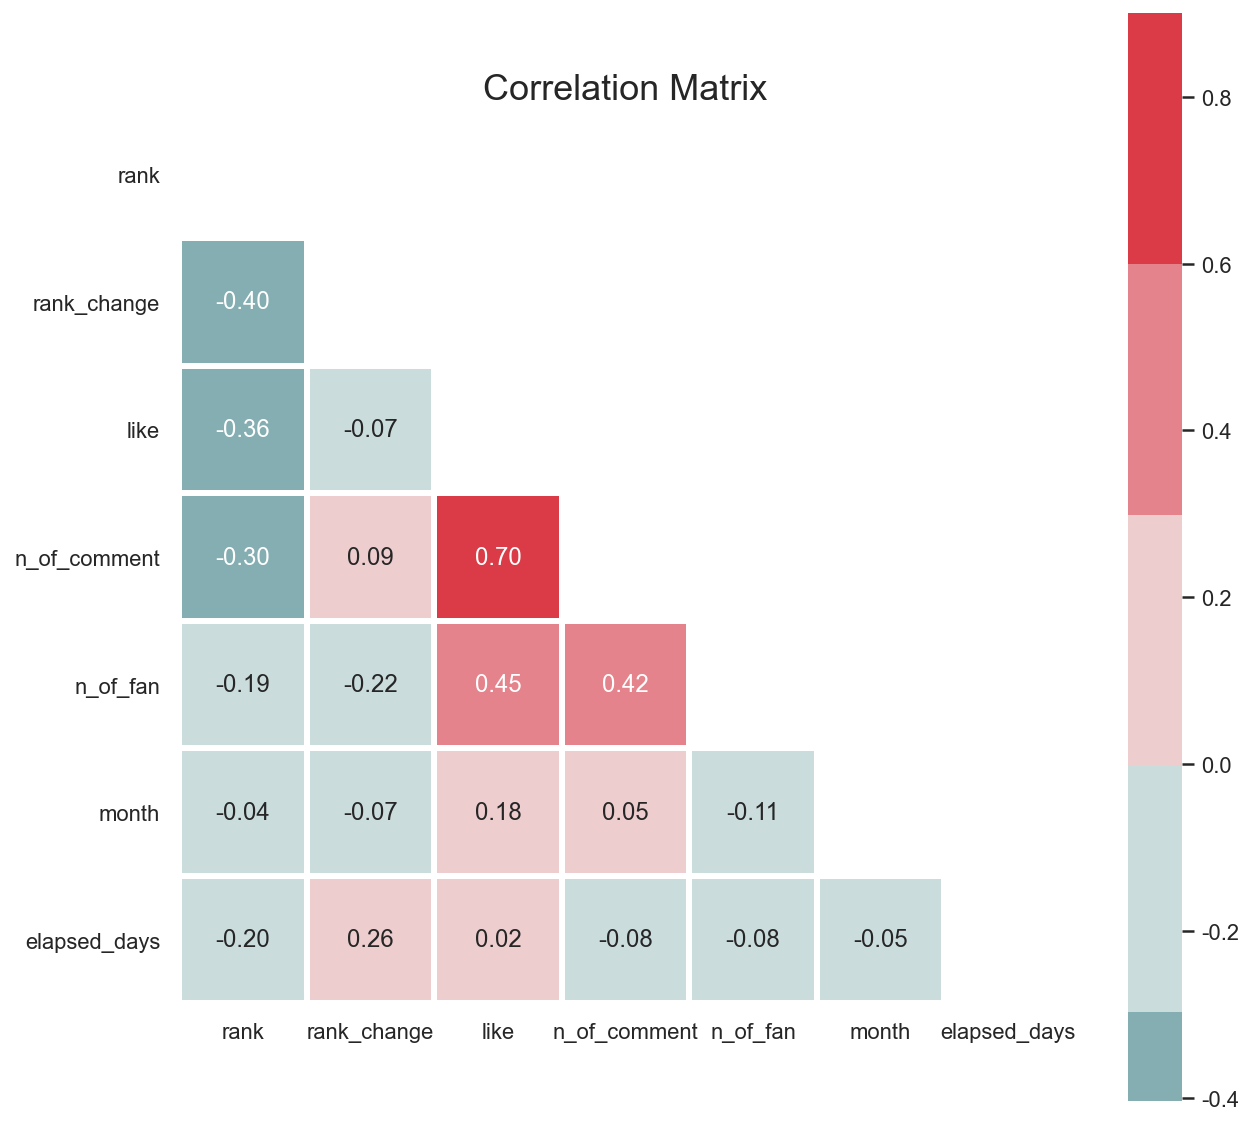

In [12]:
corr = df.corr() # 상관계수 계산

plt.figure(figsize=(10,10))
sns.set(style='white')  # 배경 흰색으로 변경
cmap = sns.diverging_palette(200, 10, as_cmap=False) #cmap 설정
mask = np.triu(np.ones_like(corr, dtype=bool)) # 하삼각행렬 마스크 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0,
            square=True, linewidths=2.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [13]:
def make_discrete_plot(df, x_feature, y_feature):
    fig = plt.figure(figsize=(20, 8))
    gs = GridSpec(1, 2)
    sns.boxplot(data=df, y=y_feature, x=x_feature, ax=fig.add_subplot(gs[0, 0]))
    plt.xlabel(x_feature, fontsize=16)
    plt.ylabel(y_feature, fontsize=16)
    plt.xticks(rotation=45)
    sns.stripplot(data=df, y=y_feature, x=x_feature, ax=fig.add_subplot(gs[0, 1]))
    plt.xlabel(x_feature, fontsize=16)
    plt.ylabel(y_feature, fontsize=16)
    plt.xticks(rotation=45)
    plt.show()
# def make_continuous_plot(df, x_feature, y_feature):
#     fig = plt.figure(figsize=(18, 15))
#     sns.regplot(data=df, x=x_feature, y=y_feature, color='green')
#     plt.show()

In [14]:
def make_continuous_plot(df, x_feature, y_feature):
    sns.regplot(data=df, x=x_feature, y=y_feature, color='green')
    plt.xlabel(x_feature, fontsize=16)
    plt.ylabel(y_feature, fontsize=16)

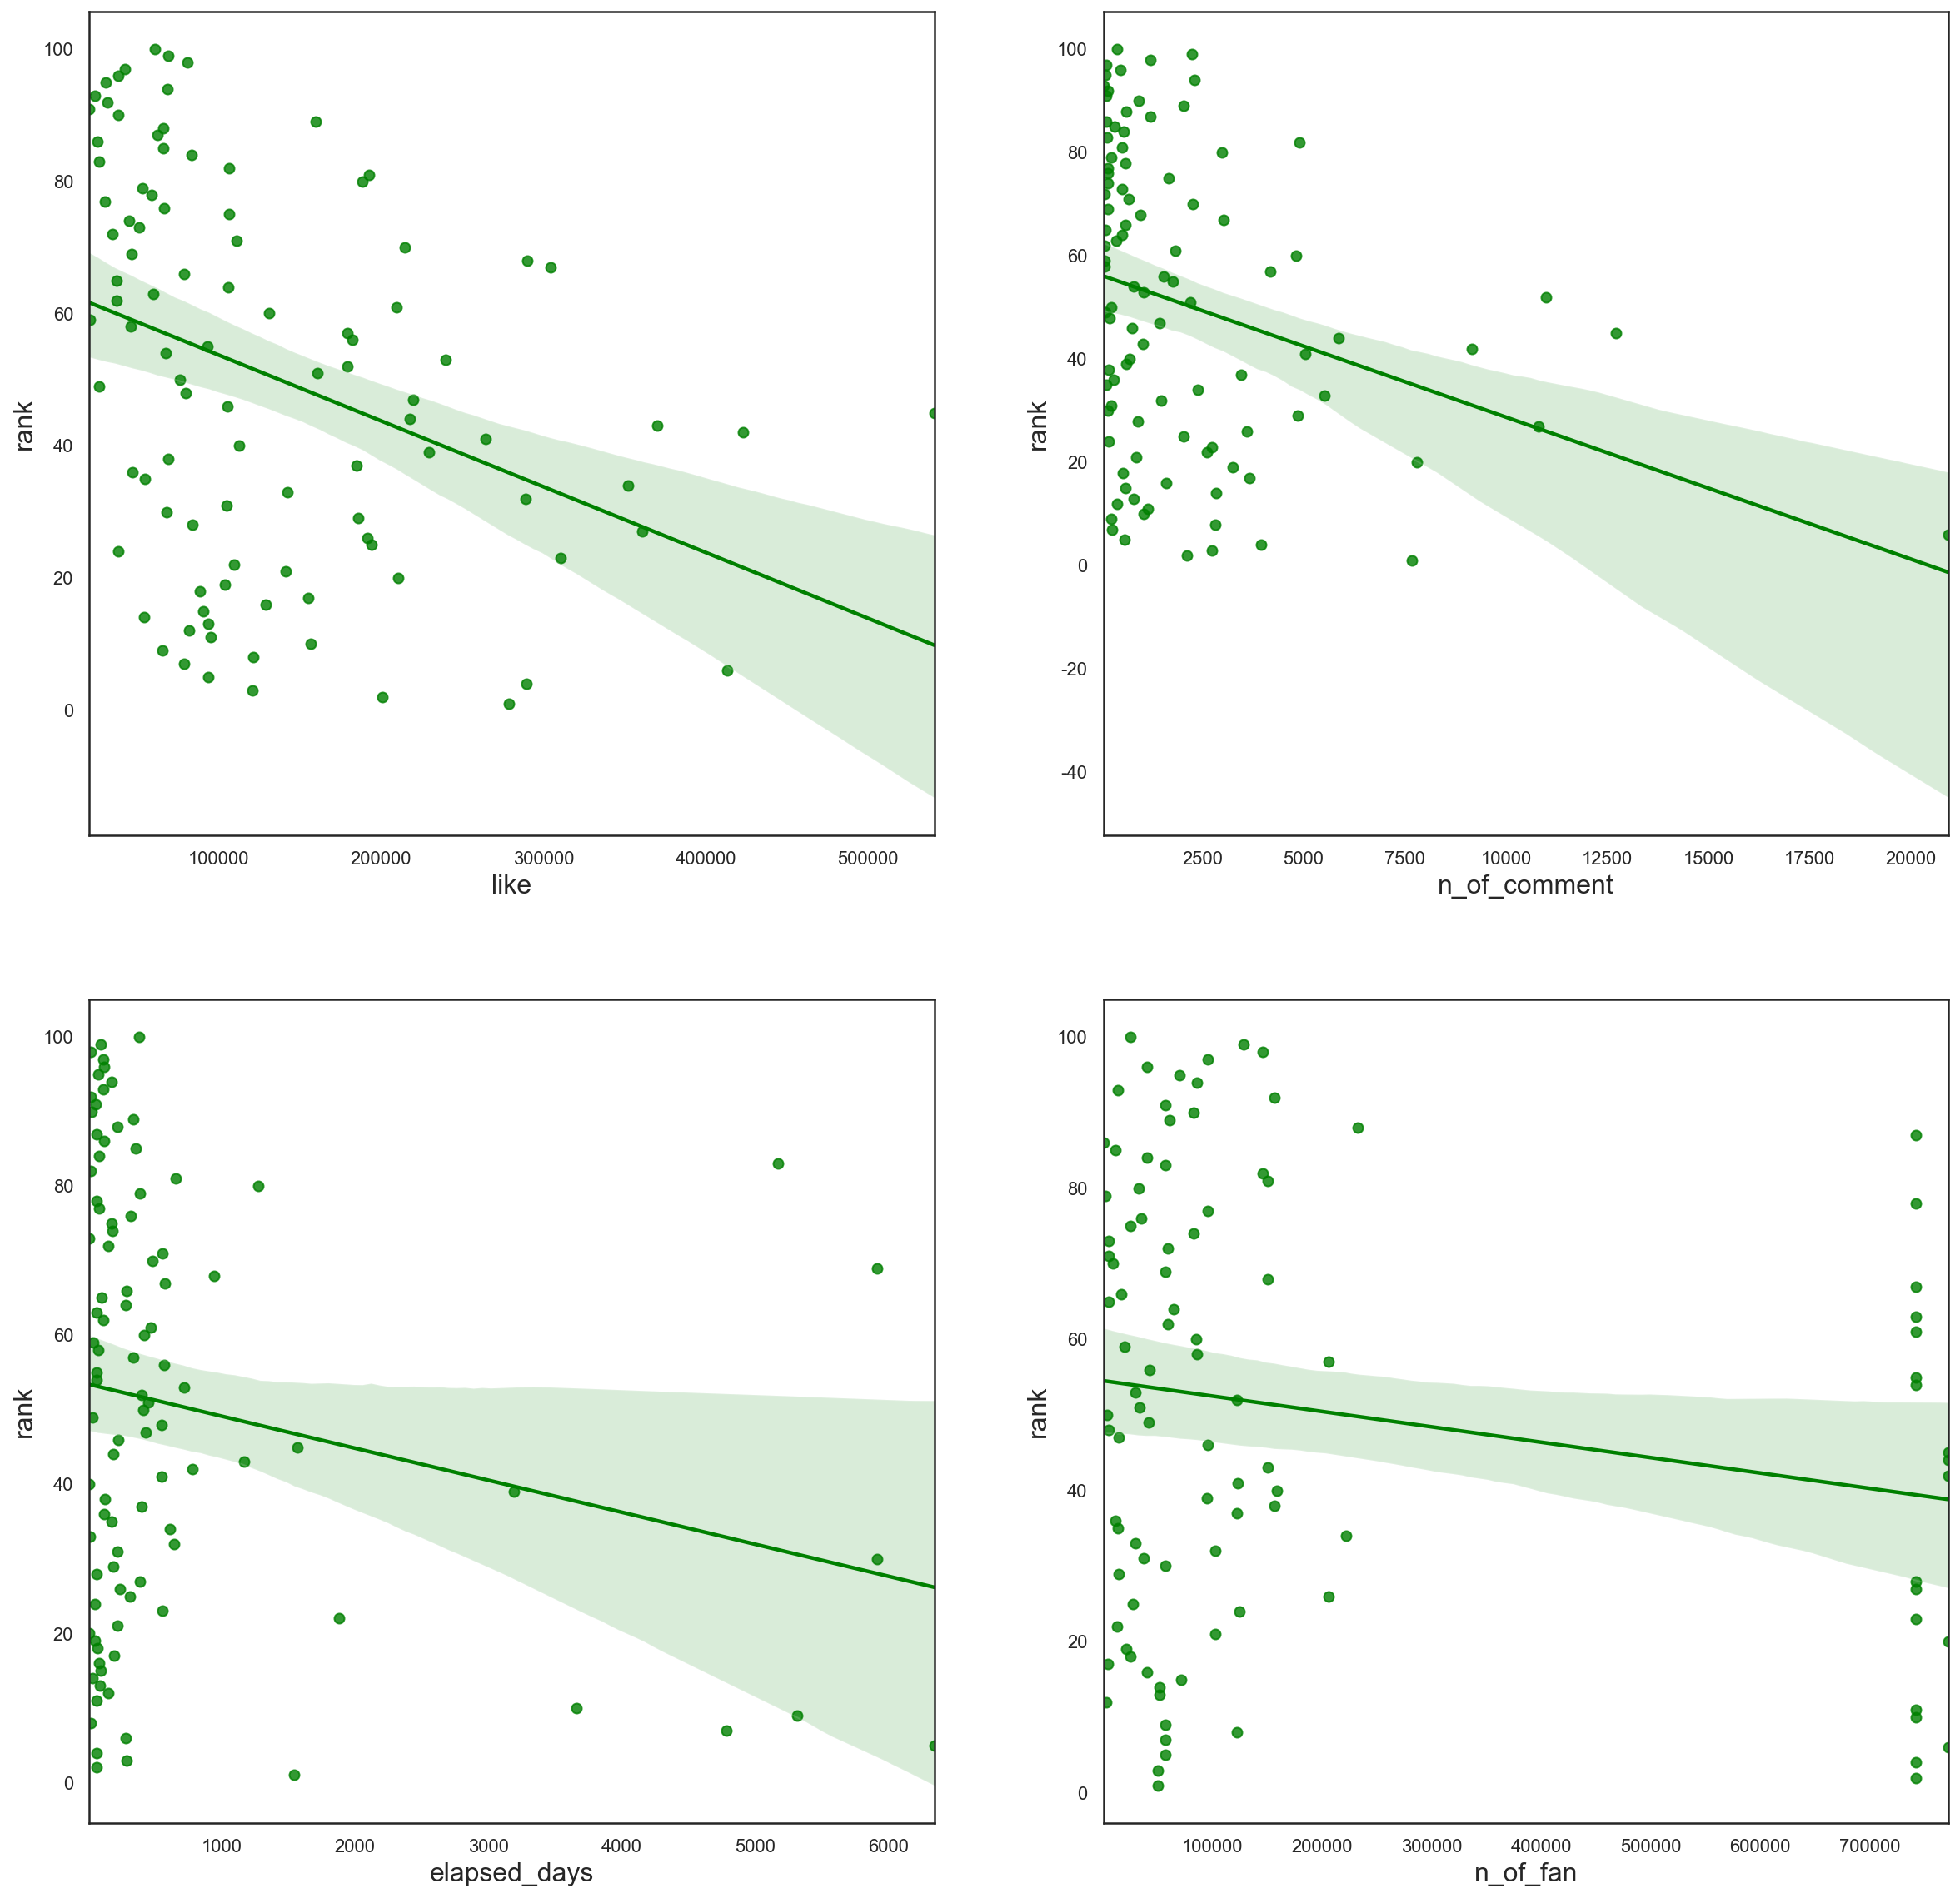

In [15]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(2, 2, 1)
make_continuous_plot(df ,'like', 'rank')
fig.add_subplot(2, 2, 2)
make_continuous_plot(df ,'n_of_comment', 'rank')
fig.add_subplot(2, 2, 3)
make_continuous_plot(df ,'elapsed_days', 'rank')
fig.add_subplot(2, 2, 4)
make_continuous_plot(df ,'n_of_fan', 'rank')
plt.show()

In [16]:
df_15 = df.loc[df['singer'].isin(singer_count_2.index)]

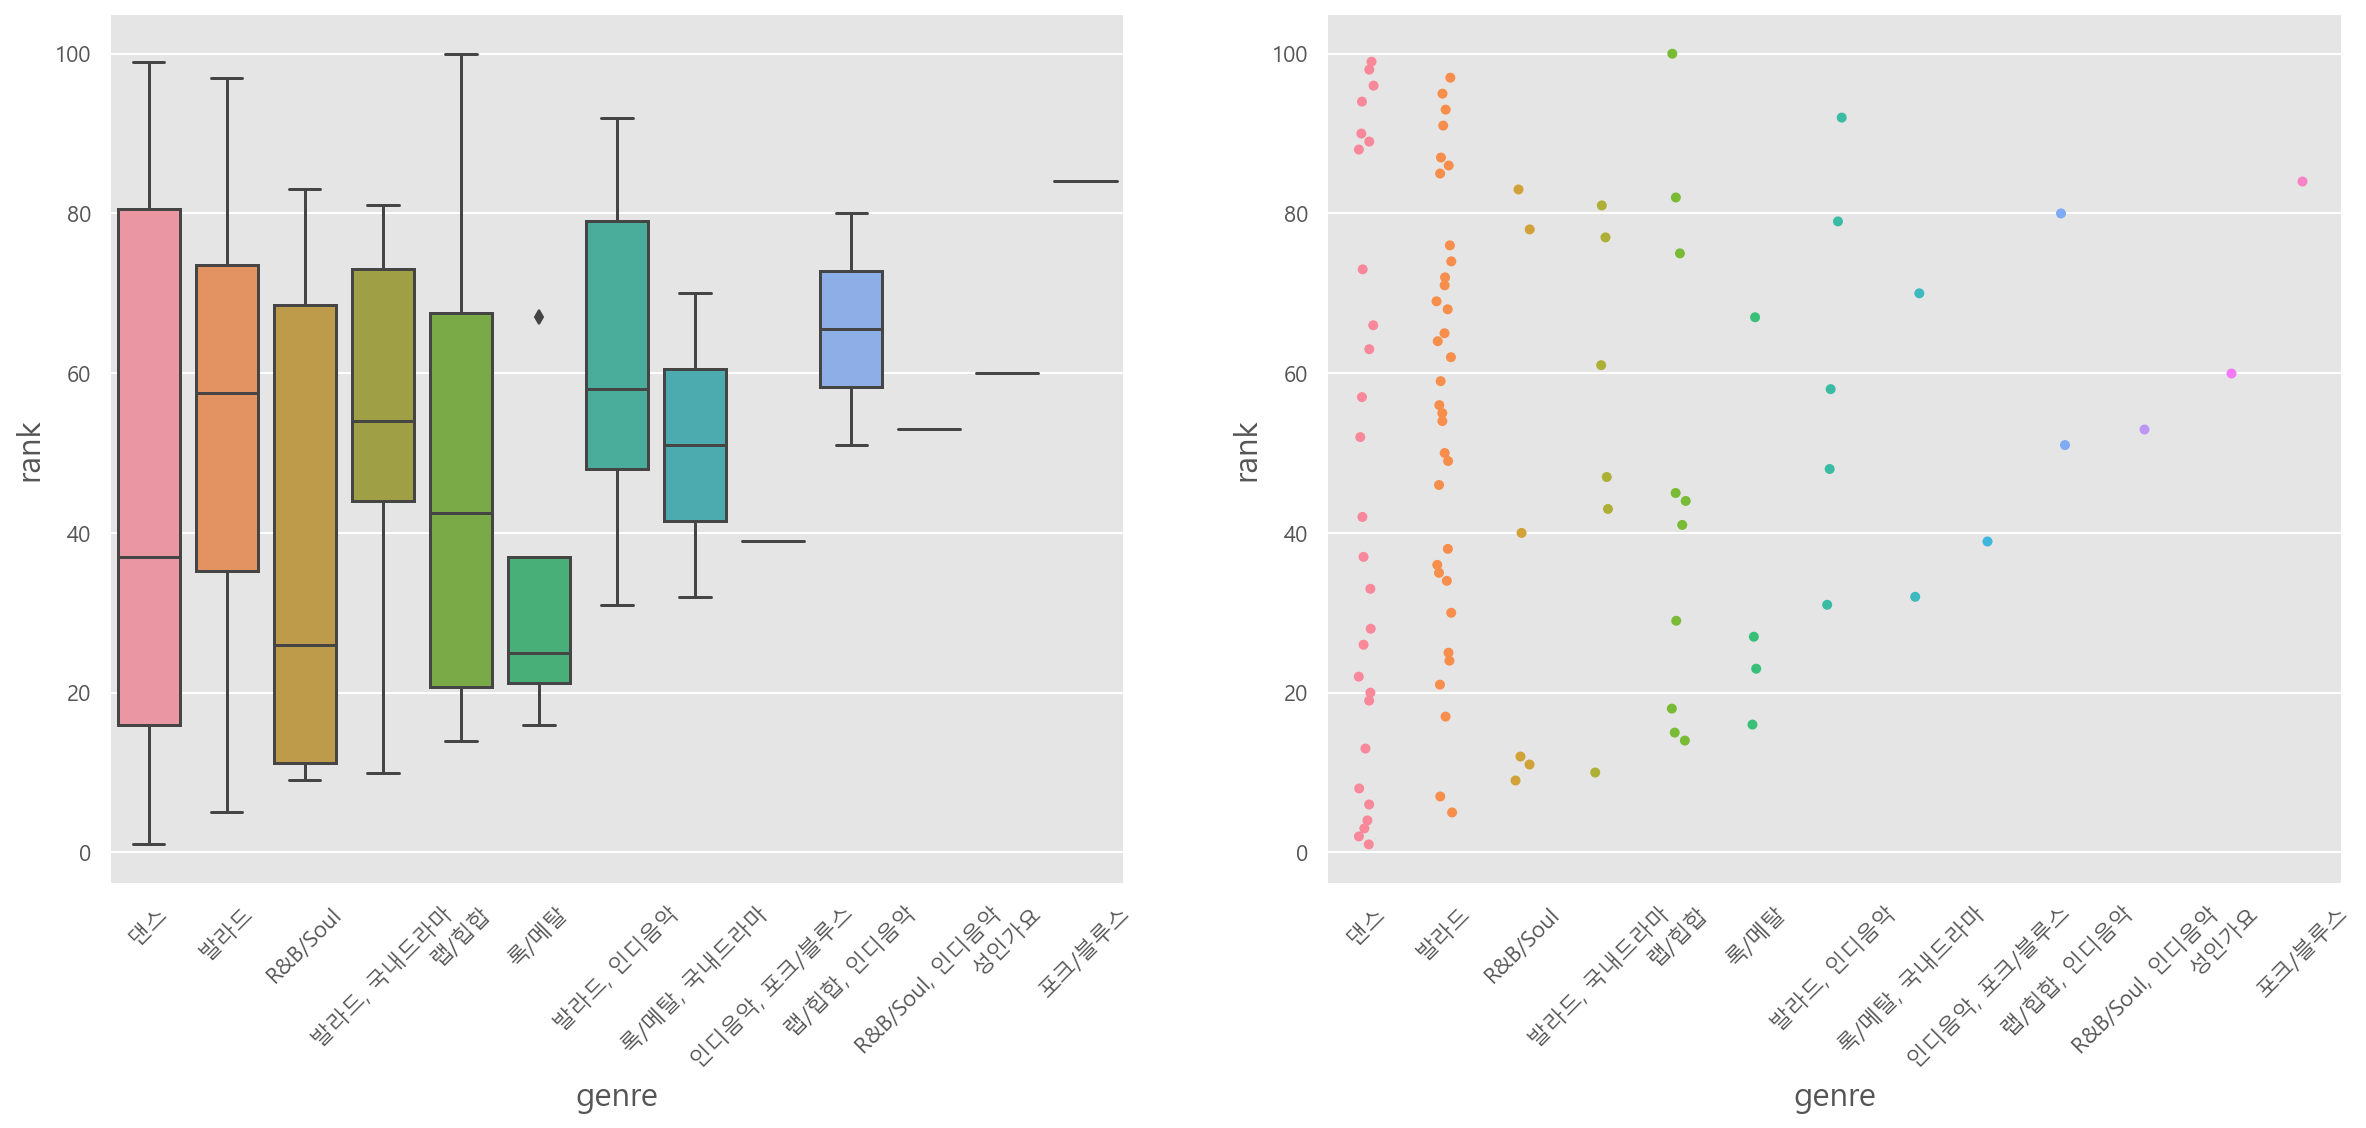

In [19]:
make_discrete_plot(df, 'genre', 'rank')

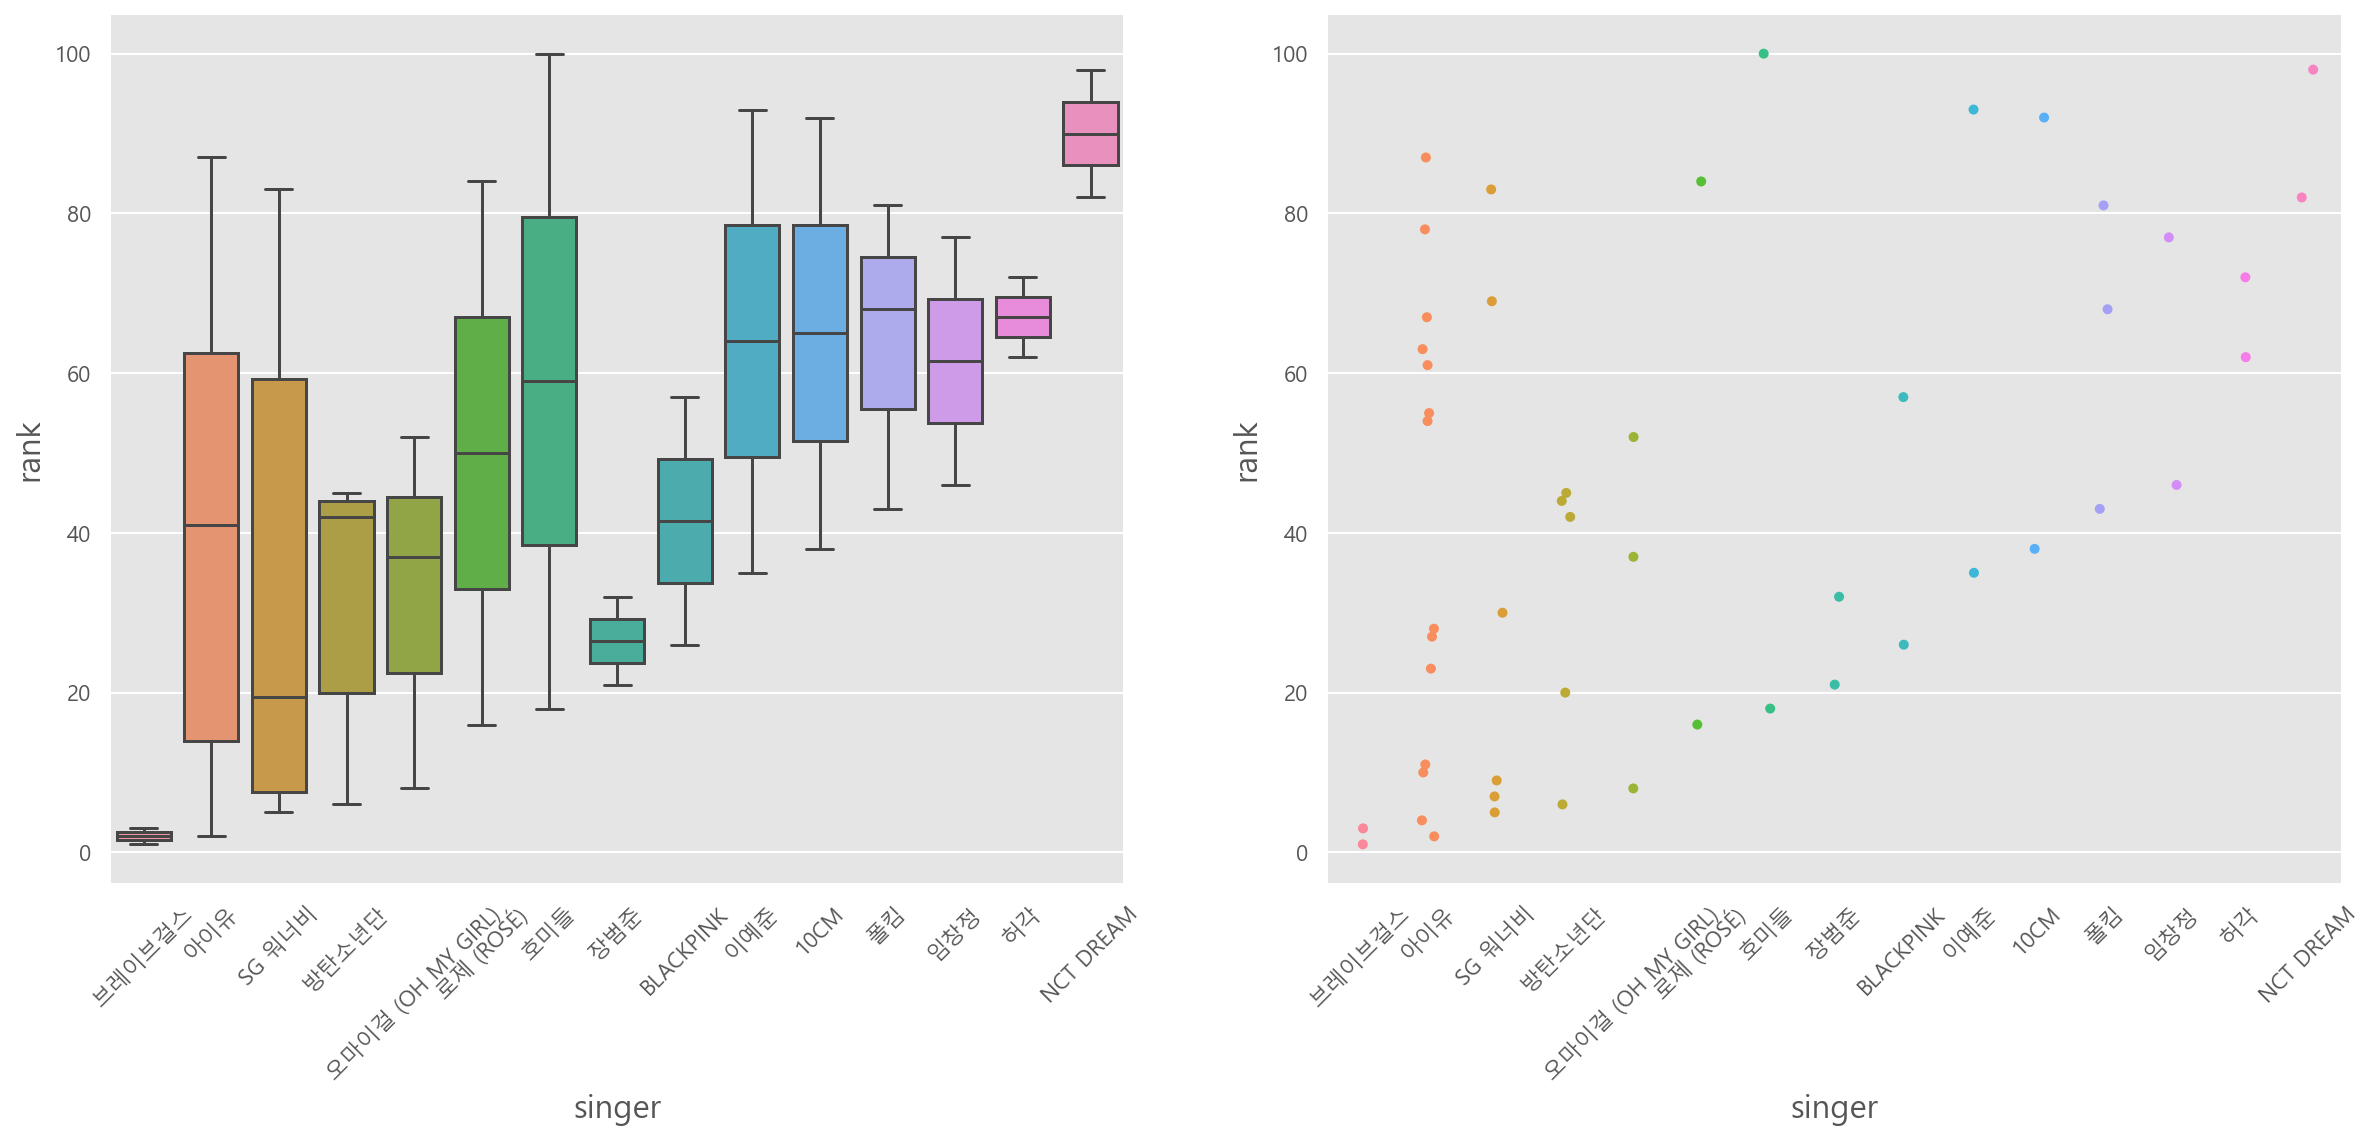

In [20]:
make_discrete_plot(df_15, 'singer', 'rank')